# Kiran avhad

# Task 3:-Decision Tree

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib as mtl
import warnings 
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import networkx as nx
from networkx.drawing.nx_pydot import write_dot
from sklearn import tree
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [202]:
iris_data = pd.read_csv('D:/FILM/Iris (2).csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [203]:
iris_data.shape

(150, 6)

In [204]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


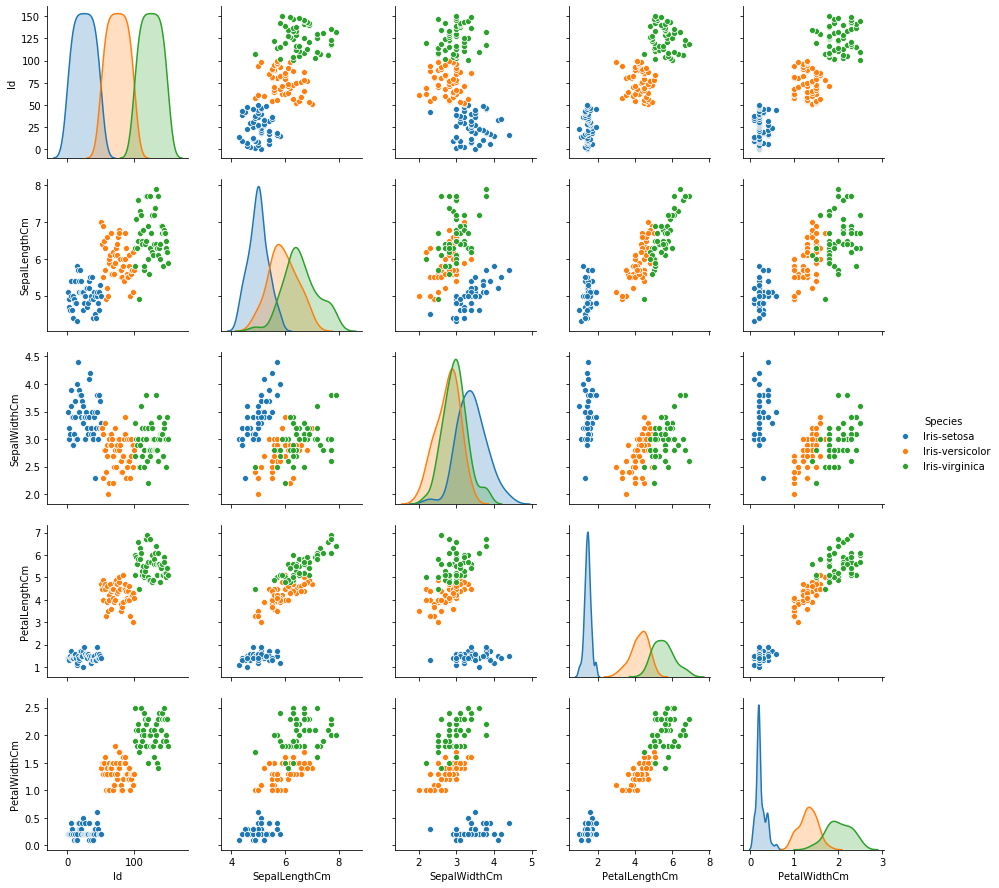

In [205]:
sns.pairplot(iris_data.dropna(), hue='Species')

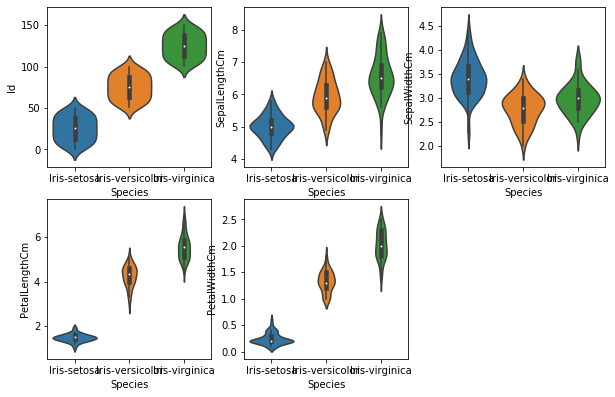

In [206]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data.columns):
    if column == 'Species':
        continue
    plt.subplot(3, 3, column_index + 1)
    sns.violinplot(x='Species', y=column, data=iris_data)

In [207]:

all_inputs = iris_data[['SepalLengthCm', 'SepalWidthCm',
                             'PetalLengthCm', 'PetalWidthCm']].values
all_labels = iris_data['Species'].values

In [208]:

from sklearn.model_selection import train_test_split

d=(training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [209]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()


In [210]:
decision_tree_classifier.fit(training_inputs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [211]:
decision_tree_classifier.score(testing_inputs, testing_classes)*100

97.36842105263158

(array([  1.,  10.,  27.,   0.,  77., 215.,   0., 316., 259.,  95.]),
 array([0.81578947, 0.83421053, 0.85263158, 0.87105263, 0.88947368,
        0.90789474, 0.92631579, 0.94473684, 0.96315789, 0.98157895,
        1.        ]),
 <a list of 10 Patch objects>)

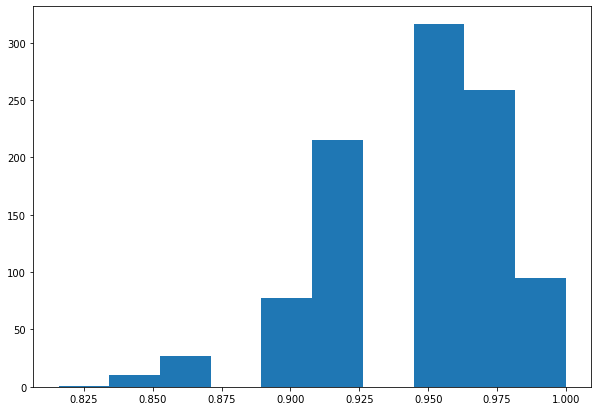

In [212]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.figure(figsize=(10,7))
plt.hist(model_accuracies)

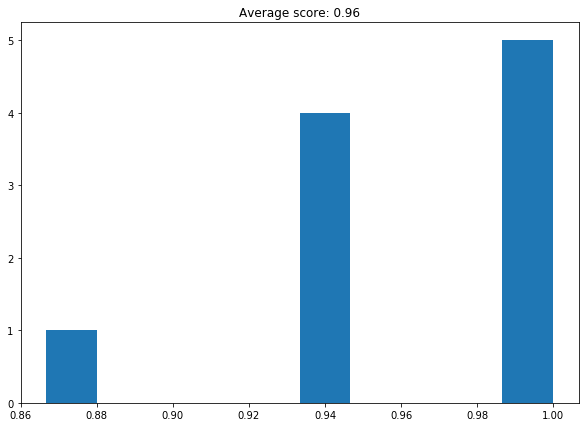

In [213]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()


cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.figure(figsize=(10,7))
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.show()

Text(0.5, 1.0, 'Average score: 0.6666666666666667')

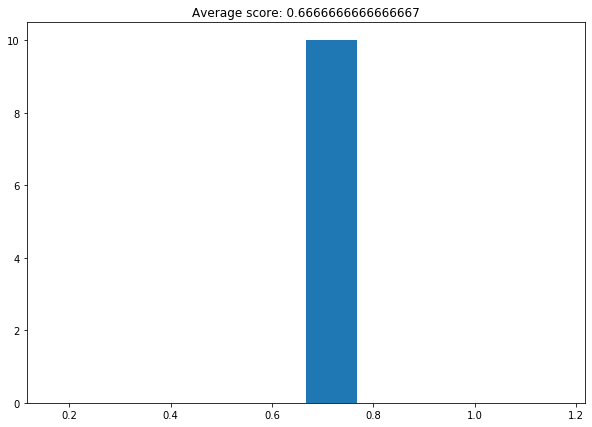

In [214]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.figure(figsize=(10,7))
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [216]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


Best score: 0.9666666666666667
Best parameters: {'max_depth': 3, 'max_features': 3}


''

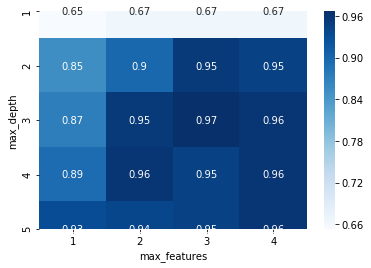

In [217]:

grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

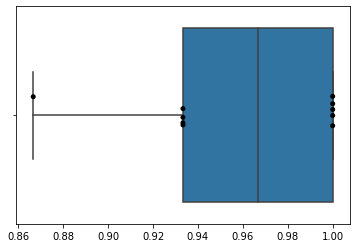

In [218]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black')

In [219]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [220]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier=DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [221]:
import sys

sys.path.append('C:/Users/usrname/AppData/Local/Continuum/anaconda3/Library/bin/graphviz/')

In [222]:
pip install graphviz


The following command must be run outside of the IPython shell:

    $ pip install graphviz

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [223]:
pip install --upgrade sklearn


The following command must be run outside of the IPython shell:

    $ pip install --upgrade sklearn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


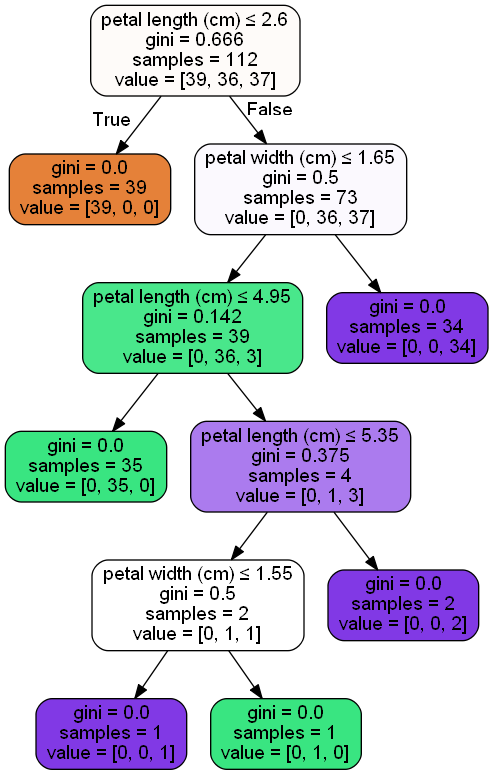

In [224]:

dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data, 
                feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())